<h1 style="text-align:center;color:green;font-size:50px;font-family:ARIAL"> Projet de Machine Learning  </h1>

<h1 style="text-align:center;color:blue;font-size:30px;font-family:times">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE)</h1><br>




<div style="display:flex;text-align:justify">
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:60%"> 
<span style="font-weight:bold">Réalisé par </span> 
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle"> 
        <li>MADJYAM Adoumbaye</li>                                      
        <li>THIAW Mansour Laye</li>
     </ul>
    <span style="font-style: italic;color:blue;font-size:13px">Eléves Ingénieurs des Travaux Statistiques</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de:</li> 
 <li>Mme Mously DIAW</li>                                     
   
</ul>
    
</div>


#                  Segmentation des clients du site E-Commerce Olist

Olist souhaite obtenir une segmentation de ses clients utilisable au quotidien par leur équipe marketing dans leurs campagnes de communication.
L'objectif est de comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles anonymisées.

Nous allons d'abord faire un traitement de l'ensemble des differentes bases ensuite faire une analyse descriptive et enfin 
nous utilisererons donc des méthodes non supervisées( Clustering avec le k-means, la classification hierarchique et le DBSCAN) pour regrouper ensemble des 
clients de profils similaire.



In [37]:
#Installation des packages pour faire la 
!pip install kmodes
!pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [38]:
import numpy as np
import pandas as pd
# Seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
from scipy import stats 
#import colorlover as cl
# Others
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
init_notebook_mode(connected=True)
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis
#import du module d'EDA automatique

from IPython.display import display
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes

dfOrdersItems = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\olist_order_items_dataset.csv')
dfOrders = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\olist_orders_dataset.csv')
dfProducts = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\olist_products_dataset.csv')
dfOrdersReviews = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\olist_order_reviews_dataset.csv')
dfSellers = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\olist_sellers_dataset.csv')
dfCustomers = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\olist_customers_dataset.csv')
dfGeolocation = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\olist_geolocation_dataset.csv')
dfTranslation = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\product_category_name_translation.csv')
dfOrderPay = pd.read_csv(r'C:\Users\MADJYAM ADOUMBAYE\Desktop\ITS4\ML Tp\archive\olist_order_payments_dataset.csv')

In [39]:
base = dfOrders.merge(dfOrdersItems, on='order_id', how='left')
base = base.merge(dfOrderPay, on='order_id', how='outer', validate='m:m')
base = base.merge(dfOrdersReviews, on='order_id', how='outer')
base = base.merge(dfProducts, on='product_id', how='outer')
base = base.merge(dfCustomers, on='customer_id', how='outer')
base = base.merge(dfSellers, on='seller_id', how='outer')
base = base.merge(dfTranslation, on='product_category_name', how='outer')
print(base.shape)


(119143, 40)


In [4]:
base

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,NaN,NaN,2018-07-20 00:00:00,1.0,5b668636d65ddf4e4109c6d8fb13ea56,...,2.0,30.0,f84487fed78baf25458828c99a2daa5d,3402,sao paulo,SP,5201.0,sao paulo,SP,books_imported
119139,1dbff949801376b8795a093d31cfe205,0cbd2df3d6e9d8b1eaf5cfefc44886bc,delivered,2018-05-16 14:50:54,2018-05-16 15:18:42,2018-05-18 12:10:00,2018-05-21 17:14:08,2018-05-28 00:00:00,1.0,90797f195eb7bb9dae050697a25f35ce,...,2.0,23.0,1de8fb735d8252498d9a2f82a68c57e0,9411,ribeirao pires,SP,5201.0,sao paulo,SP,books_imported
119140,6775b950cdc4da0ce39b261032f92c84,c4d135422be0d4333f506acde8af9419,delivered,2018-06-13 12:19:26,2018-06-13 17:39:14,2018-06-15 13:09:00,2018-06-16 17:48:30,2018-06-28 00:00:00,1.0,3e72533d34a1779d818ac8a73403387c,...,2.0,23.0,5f684afb3d1a02f2787e80cb0eee6e02,2927,sao paulo,SP,5201.0,sao paulo,SP,books_imported
119141,73d60420cd1a179b2d8887d538efe4c2,65d9213dfa004c17dc126503e106e4a3,delivered,2018-08-07 10:52:58,2018-08-07 11:05:18,2018-08-08 08:31:00,2018-08-22 17:02:23,2018-09-04 00:00:00,1.0,078b7149a32b479d3cbf1649fea0172c,...,14.0,16.0,78275e95a4296105923051e0ad4577b3,65700,bacabal,MA,22745.0,rio de janeiro,RJ,books_imported


In [40]:
base=base.drop_duplicates('customer_id')
base

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP,housewares
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,9350.0,maua,SP,housewares
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2.0,be03d93320192443b8fa24c0ca6ead98,...,16.0,13.0,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,9350.0,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,NaN,NaN,2018-07-20 00:00:00,1.0,5b668636d65ddf4e4109c6d8fb13ea56,...,2.0,30.0,f84487fed78baf25458828c99a2daa5d,3402,sao paulo,SP,5201.0,sao paulo,SP,books_imported
119139,1dbff949801376b8795a093d31cfe205,0cbd2df3d6e9d8b1eaf5cfefc44886bc,delivered,2018-05-16 14:50:54,2018-05-16 15:18:42,2018-05-18 12:10:00,2018-05-21 17:14:08,2018-05-28 00:00:00,1.0,90797f195eb7bb9dae050697a25f35ce,...,2.0,23.0,1de8fb735d8252498d9a2f82a68c57e0,9411,ribeirao pires,SP,5201.0,sao paulo,SP,books_imported
119140,6775b950cdc4da0ce39b261032f92c84,c4d135422be0d4333f506acde8af9419,delivered,2018-06-13 12:19:26,2018-06-13 17:39:14,2018-06-15 13:09:00,2018-06-16 17:48:30,2018-06-28 00:00:00,1.0,3e72533d34a1779d818ac8a73403387c,...,2.0,23.0,5f684afb3d1a02f2787e80cb0eee6e02,2927,sao paulo,SP,5201.0,sao paulo,SP,books_imported
119141,73d60420cd1a179b2d8887d538efe4c2,65d9213dfa004c17dc126503e106e4a3,delivered,2018-08-07 10:52:58,2018-08-07 11:05:18,2018-08-08 08:31:00,2018-08-22 17:02:23,2018-09-04 00:00:00,1.0,078b7149a32b479d3cbf1649fea0172c,...,14.0,16.0,78275e95a4296105923051e0ad4577b3,65700,bacabal,MA,22745.0,rio de janeiro,RJ,books_imported


In [41]:
base['locality'] = base.apply(lambda x: 'Same locality' if x['customer_state'] == x['seller_state'] else 'Different locality', axis=1)

In [42]:
frequences = base['locality'].value_counts()
frequences

Different locality    63967
Same locality         35474
Name: locality, dtype: int64

In [43]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [44]:
missing_values_table(base)

Your selected dataframe has 41 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,87890,88.4
review_comment_message,58656,59.0
order_delivered_customer_date,2965,3.0
product_category_name_english,2207,2.2
product_description_lenght,2186,2.2
product_name_lenght,2186,2.2
product_category_name,2186,2.2
product_photos_qty,2186,2.2
order_delivered_carrier_date,1783,1.8
product_width_cm,791,0.8


In [45]:
# retouver les colonnes qui dépassent 50 %
missing_df = missing_values_table(base);
missing_columns= list(missing_df[missing_df['% of Total Values'] > 50].index)
print('ous allons supprimer  ces %d colonnes.' % len(missing_columns))

Your selected dataframe has 41 columns.
There are 31 columns that have missing values.
ous allons supprimer  ces 2 colonnes.


In [46]:
base = base.drop(columns = list(missing_columns))

In [47]:
base

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,locality
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,housewares,Same locality
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP,housewares,Same locality
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP,housewares,Same locality
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,9350.0,maua,SP,housewares,Different locality
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2.0,be03d93320192443b8fa24c0ca6ead98,...,13.0,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,9350.0,maua,SP,housewares,Same locality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,NaN,NaN,2018-07-20 00:00:00,1.0,5b668636d65ddf4e4109c6d8fb13ea56,...,30.0,f84487fed78baf25458828c99a2daa5d,3402,sao paulo,SP,5201.0,sao paulo,SP,books_imported,Same locality
119139,1dbff949801376b8795a093d31cfe205,0cbd2df3d6e9d8b1eaf5cfefc44886bc,delivered,2018-05-16 14:50:54,2018-05-16 15:18:42,2018-05-18 12:10:00,2018-05-21 17:14:08,2018-05-28 00:00:00,1.0,90797f195eb7bb9dae050697a25f35ce,...,23.0,1de8fb735d8252498d9a2f82a68c57e0,9411,ribeirao pires,SP,5201.0,sao paulo,SP,books_imported,Same locality
119140,6775b950cdc4da0ce39b261032f92c84,c4d135422be0d4333f506acde8af9419,delivered,2018-06-13 12:19:26,2018-06-13 17:39:14,2018-06-15 13:09:00,2018-06-16 17:48:30,2018-06-28 00:00:00,1.0,3e72533d34a1779d818ac8a73403387c,...,23.0,5f684afb3d1a02f2787e80cb0eee6e02,2927,sao paulo,SP,5201.0,sao paulo,SP,books_imported,Same locality
119141,73d60420cd1a179b2d8887d538efe4c2,65d9213dfa004c17dc126503e106e4a3,delivered,2018-08-07 10:52:58,2018-08-07 11:05:18,2018-08-08 08:31:00,2018-08-22 17:02:23,2018-09-04 00:00:00,1.0,078b7149a32b479d3cbf1649fea0172c,...,16.0,78275e95a4296105923051e0ad4577b3,65700,bacabal,MA,22745.0,rio de janeiro,RJ,books_imported,Different locality


In [48]:
categorical_features = list(base.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)
categorical_features

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'payment_type',
 'review_id',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'seller_city',
 'seller_state',
 'product_category_name_english',
 'locality']

In [49]:
numerical_features = list(base.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['order_item_id',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_zip_code_prefix',
 'seller_zip_code_prefix']

In [50]:
statistics = base.describe()

print(statistics)

       order_item_id         price  freight_value  payment_sequential  \
count   98666.000000  98666.000000   98666.000000        99440.000000   
mean        1.016946    125.923563      20.181909            1.022878   
std         0.148701    191.337444      15.896240            0.250282   
min         1.000000      0.850000       0.000000            1.000000   
25%         1.000000     41.500000      13.280000            1.000000   
50%         1.000000     79.000000      16.350000            1.000000   
75%         1.000000    139.900000      21.220000            1.000000   
max         7.000000   6735.000000     409.680000           27.000000   

       payment_installments  payment_value  review_score  product_name_lenght  \
count          99440.000000   99440.000000  98673.000000         97255.000000   
mean               2.915617     158.334781      4.086853            48.851370   
std                2.709861     219.518488      1.347287             9.996237   
min               

In [51]:
corr_matrix = base.corr()

print(corr_matrix)

                            order_item_id     price  freight_value  \
order_item_id                    1.000000 -0.027167      -0.023600   
price                           -0.027167  1.000000       0.422217   
freight_value                   -0.023600  0.422217       1.000000   
payment_sequential               0.008383  0.005276       0.011688   
payment_installments             0.048220  0.312110       0.207109   
payment_value                    0.051250  0.907707       0.453525   
review_score                    -0.065949 -0.012285      -0.037831   
product_name_lenght              0.013999  0.014434       0.024503   
product_description_lenght      -0.033091  0.202272       0.097181   
product_photos_qty              -0.021907  0.050410       0.023381   
product_weight_g                -0.010375  0.342658       0.614879   
product_length_cm               -0.001817  0.147233       0.316871   
product_height_cm               -0.018629  0.233772       0.393460   
product_width_cm    

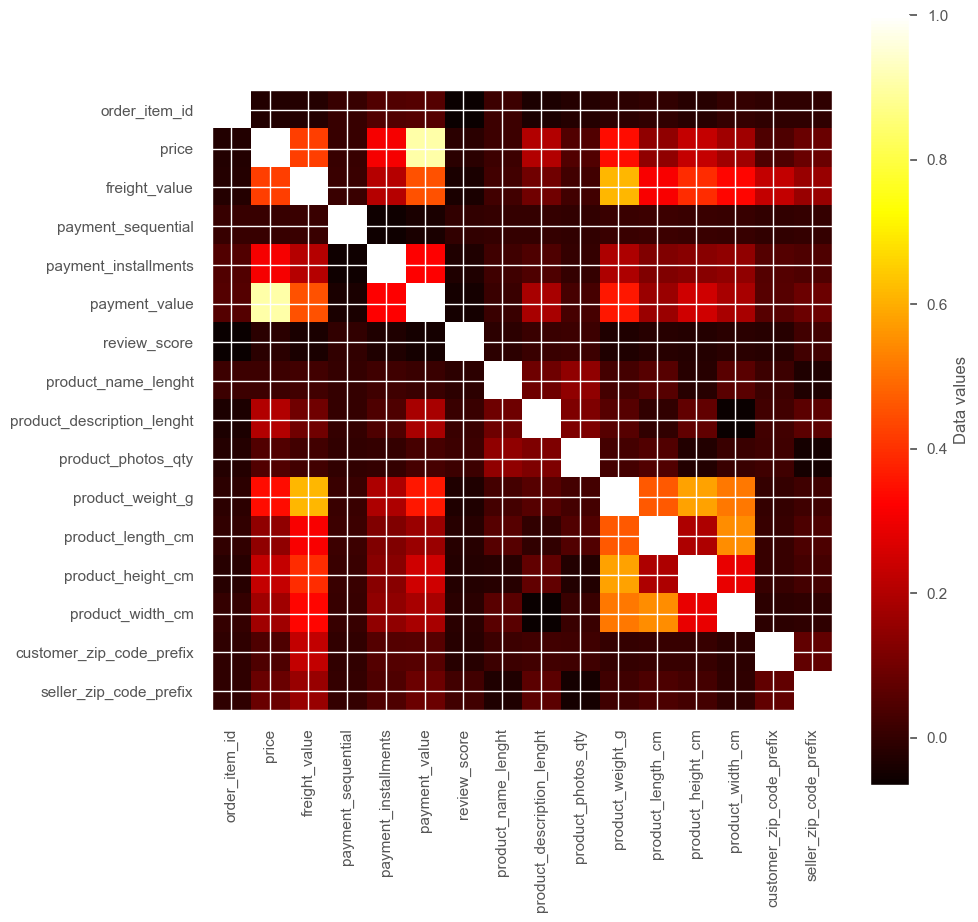

In [52]:
#Calcul de la corrélation entre les colonnes numériques
corr = base[numerical_features].corr()

# Tracé de la heatmap de corrélation
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar(label='Data values')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

## Expliquer le choix des variables

In [53]:
base.drop(['customer_id','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
 'order_estimated_delivery_date', 'product_id','seller_id',
 'shipping_limit_date','review_id', 'review_creation_date','review_answer_timestamp',
  'customer_state', 'seller_city' ,'seller_state',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm','payment_value',
 'product_height_cm',
 'product_width_cm',
 'customer_zip_code_prefix','order_id','product_category_name','order_status','customer_city','customer_unique_id',
 'seller_zip_code_prefix'], axis=1, inplace=True)
base


,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,review_score,product_category_name_english,locality
0,1.0,29.99,8.72,1.0,credit_card,1.0,4.0,housewares,Same locality
3,1.0,29.99,7.78,1.0,credit_card,3.0,4.0,housewares,Same locality
4,1.0,29.99,7.78,1.0,credit_card,1.0,5.0,housewares,Same locality
5,1.0,29.99,14.10,1.0,boleto,1.0,3.0,housewares,Different locality
6,2.0,46.80,67.70,1.0,credit_card,1.0,1.0,housewares,Same locality
...,...,...,...,...,...,...,...,...,...
119138,1.0,44.99,7.58,1.0,credit_card,1.0,1.0,books_imported,Same locality
119139,1.0,58.99,7.39,1.0,credit_card,1.0,5.0,books_imported,Same locality
119140,1.0,23.99,7.43,1.0,boleto,1.0,5.0,books_imported,Same locality
119141,1.0,749.00,55.96,1.0,credit_card,10.0,5.0,books_imported,Different locality


In [55]:
base = base.rename(columns={'product_category_name_english': 'product_category_name'})
base['product_category'] = np.where(base['product_category_name'].str.contains("fashio|luggage|health|beauty|perfum"),
                                    'mode_vêtements_accessoires_beaute',
                                    np.where(base['product_category_name'].str.contains("book|cd|dvd|media"),
                                             'Livre_AudioVisuel',
                                             np.where(base['product_category_name'].str.contains("grocer|food|drink"), 
                                                      'Nourriture_Boisson',
                                                      np.where(base['product_category_name'].str.contains("phon|compu|tablet|electro|consol|toy|baby|diaper"), 
                                                               'Technologies_Jouet',
                                                               np.where(base['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc"), 
                                                                        'Fourniture_de_maison',
                                                                        np.where(base['product_category_name'].str.contains("flow|gift|stuff"),
                                                                                 'Cadeaux_Fleurs',
                                                                                 np.where(base['product_category_name'].str.contains("sport"),
                                                                                 'Sport',
                                                                                 'Autres')))))))


In [56]:
base.drop(['product_category_name'], axis=1, inplace=True)
base

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,review_score,locality,product_category
0,1.0,29.99,8.72,1.0,credit_card,1.0,4.0,Same locality,Fourniture_de_maison
3,1.0,29.99,7.78,1.0,credit_card,3.0,4.0,Same locality,Fourniture_de_maison
4,1.0,29.99,7.78,1.0,credit_card,1.0,5.0,Same locality,Fourniture_de_maison
5,1.0,29.99,14.10,1.0,boleto,1.0,3.0,Different locality,Fourniture_de_maison
6,2.0,46.80,67.70,1.0,credit_card,1.0,1.0,Same locality,Fourniture_de_maison
...,...,...,...,...,...,...,...,...,...
119138,1.0,44.99,7.58,1.0,credit_card,1.0,1.0,Same locality,Livre_AudioVisuel
119139,1.0,58.99,7.39,1.0,credit_card,1.0,5.0,Same locality,Livre_AudioVisuel
119140,1.0,23.99,7.43,1.0,boleto,1.0,5.0,Same locality,Livre_AudioVisuel
119141,1.0,749.00,55.96,1.0,credit_card,10.0,5.0,Different locality,Livre_AudioVisuel


# ANALYSE DESCRIPTIVE

In [57]:
statistics = base.describe()

print(statistics)

       order_item_id         price  freight_value  payment_sequential  \
count   98666.000000  98666.000000   98666.000000        99440.000000   
mean        1.016946    125.923563      20.181909            1.022878   
std         0.148701    191.337444      15.896240            0.250282   
min         1.000000      0.850000       0.000000            1.000000   
25%         1.000000     41.500000      13.280000            1.000000   
50%         1.000000     79.000000      16.350000            1.000000   
75%         1.000000    139.900000      21.220000            1.000000   
max         7.000000   6735.000000     409.680000           27.000000   

       payment_installments  review_score  
count          99440.000000  98673.000000  
mean               2.915617      4.086853  
std                2.709861      1.347287  
min                0.000000      1.000000  
25%                1.000000      4.000000  
50%                2.000000      5.000000  
75%                4.000000      5

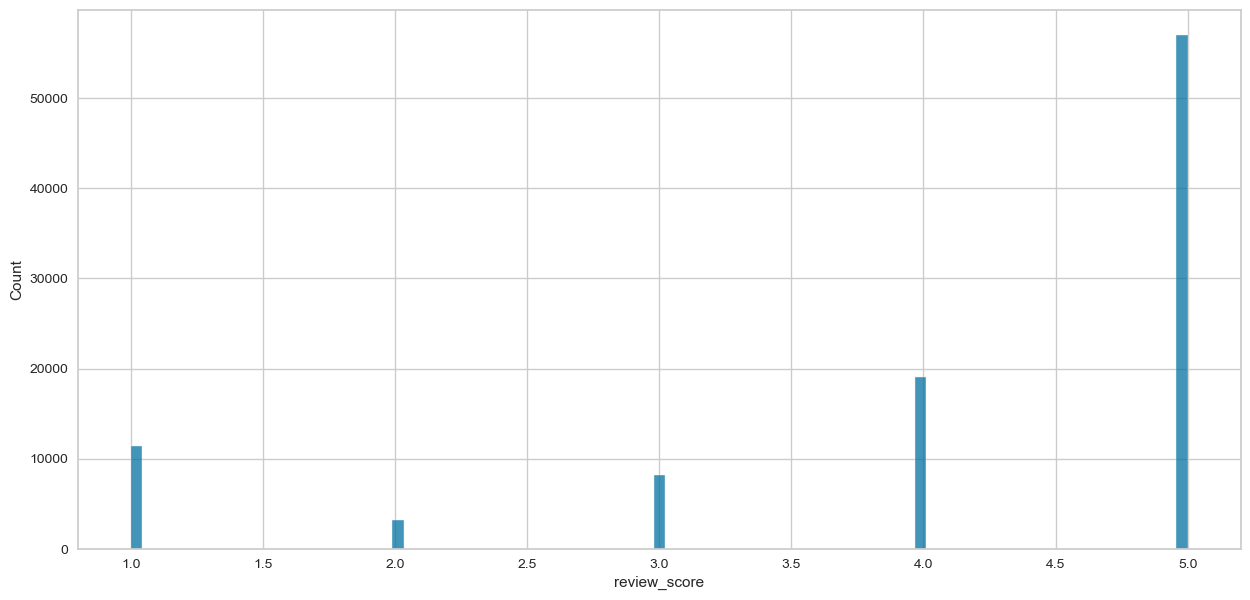

In [22]:
fig = plt.figure(figsize=(15,7))
ax = sns.histplot(data=base, x = 'review_score')
ax.set_xlabel("review_score")
plt.show()

Cette distrubition renseigne la note allant de 1 à 5 donnée par le client sur une enquête de satisfaction.
Nous constatons que la majorité des clients sont trés satisfaits du service. Cependant plus de 10000 ne sont pas satisfaits.

In [58]:
var_to_hist = [ 'price', 'freight_value']

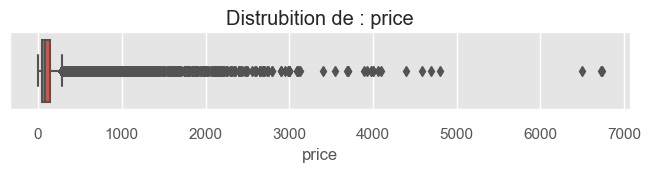

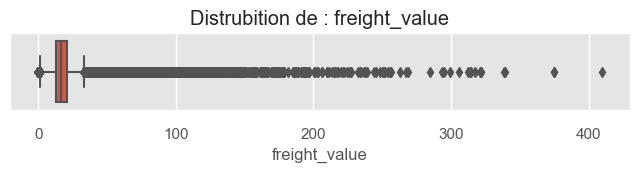

In [59]:
for column in var_to_hist :
    plt.figure(figsize=(8,1))
    sns.boxplot(x=base[column])
    chaine = 'Distrubition de : ' +column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

Le boxplot nous montre la distrubition des variables payment_value price et freight_value Les trois variables présentent des valeurs qui sont éloignés de la moyenne cependant leur nombre nest pas élevé et considéré comme négligeable

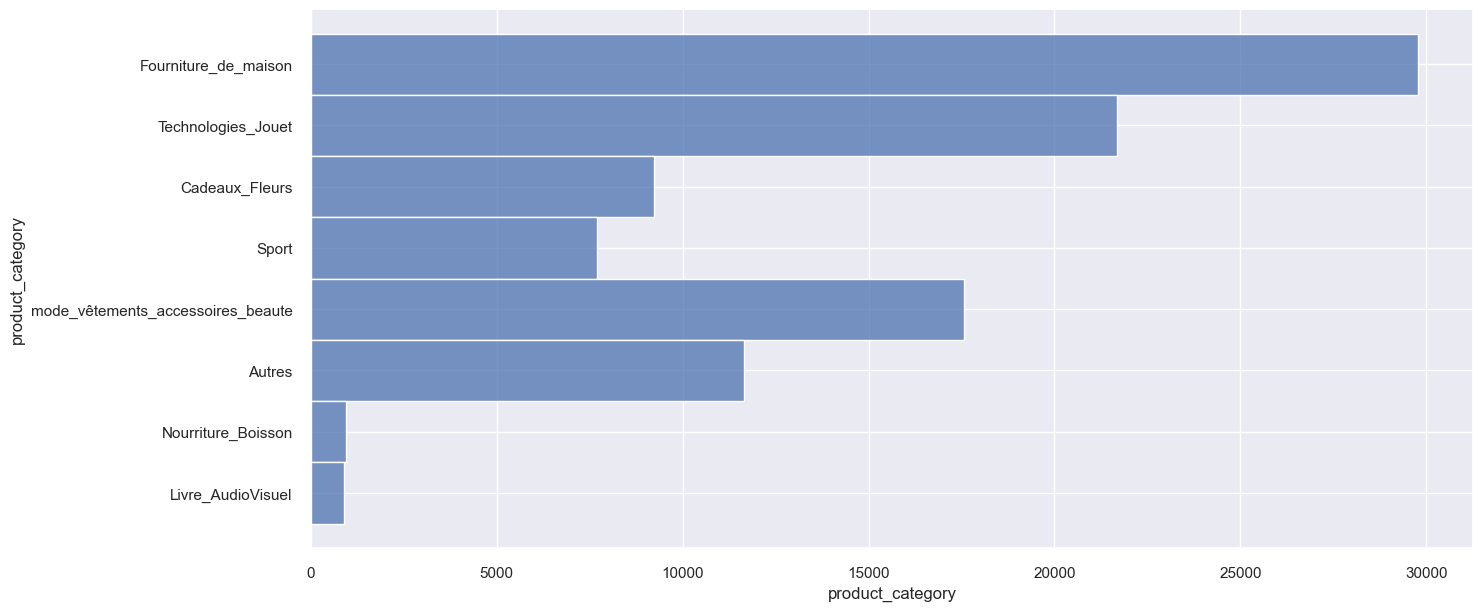

In [60]:
fig = plt.figure(figsize=(15,7))
ax = sns.histplot(data=base, y = 'product_category')
ax.set_xlabel("product_category")
plt.show()

In [26]:
## price summary
#prix total = prix + frais de port
base['Total_price'] = base['price'] + base['freight_value']
print('le prix moyen est {}'.format((np.mean(base['price']))))
print('La moyenne total des prix est {}'.format((np.mean(base['Total_price']))))

le prix moyen est 125.9235627268874
La moyenne total des prix est 146.1054713883085


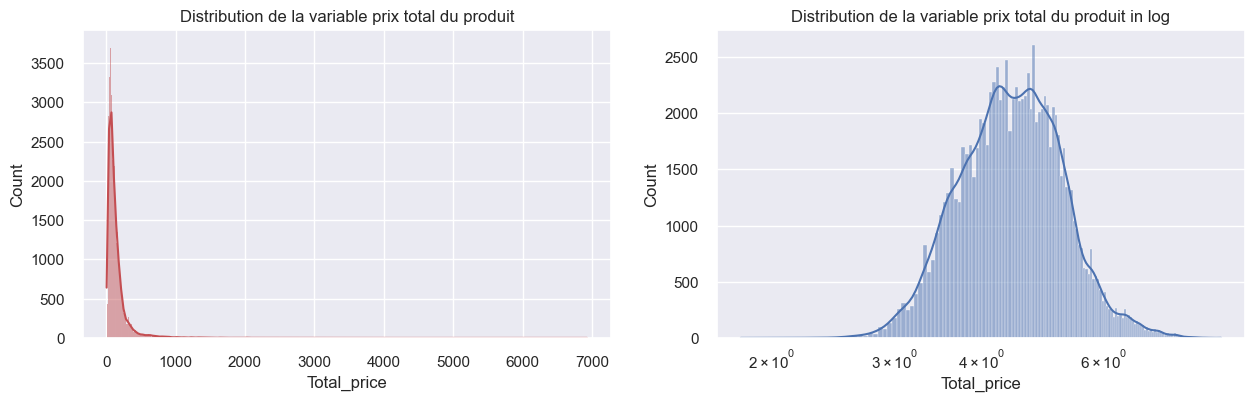

In [27]:
fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(15,4))
sns.histplot(base['Total_price'], color ='r', kde = True, ax=axes[0])
axes[0].set_title ( "Distribution de la variable prix total du produit")
log_cons = np.log(base['Total_price'])
sns.histplot(log_cons,color='b', kde=True, ax=axes[1])
axes[1].set_title ("Distribution de la variable prix total du produit in log")
axes[1].set_xscale('log');

La distribution du prix total des produits suis une decroissance continue mais des lors que le logarithme est ajoiuté on voit
une distrubition ressemblant à la distrubition de la loi normale.

<AxesSubplot:xlabel='price', ylabel='freight_value'>

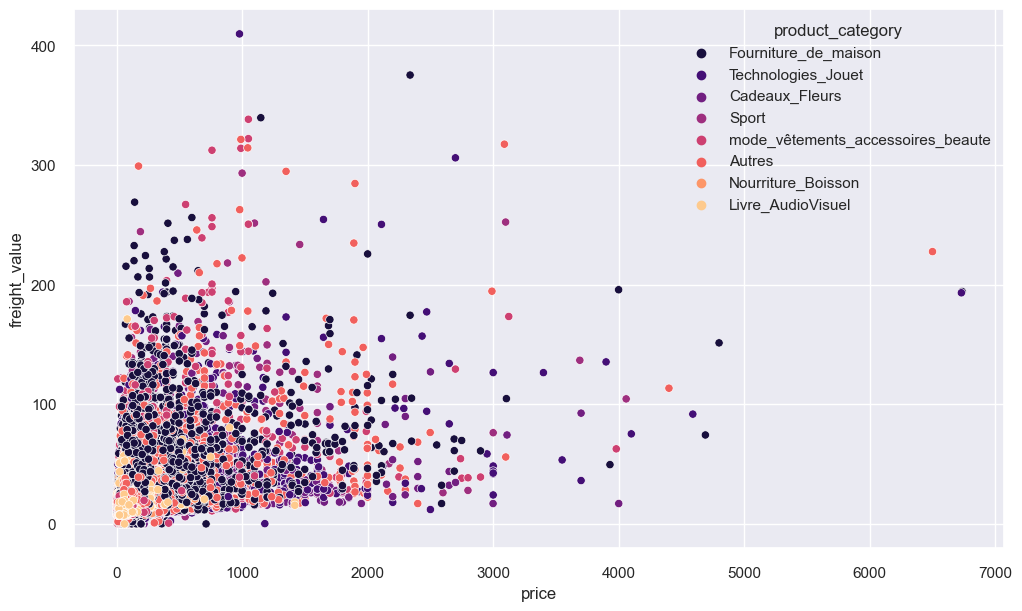

In [28]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='price',y='freight_value', data=base, palette='magma', hue='product_category')

### Transformation de la base en numerique

#### Procédure
Nous allons donc utiliser un certain nombre de variables pertinantes pouvant expliquer regrouper les individus similaires dans une meme classe. Nous avanos utiliser les variables telles que  le prix des articles, les moyens et outils relatifs au paiement,le score attibué qucours d'une enquete de satisfaction, les types d'articles ou produits achetés et la variable localité qui considere si l'acheteur et le vendeur se trouvent dans le meme Etat.
Les données seront transformées en numérique pour faire le clustering, pour ce faire pour  chaque variable multichotomique on utilise les modalites comme variable binaire si l'individu prend ou pas la modalite.
la variable payment_value est ecartee vu sa forte coorelation avec le prix

In [61]:
base = pd.get_dummies(base, columns=['payment_type','product_category','locality'])
base


,order_item_id,price,freight_value,payment_sequential,payment_installments,review_score,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,...,product_category_Autres,product_category_Cadeaux_Fleurs,product_category_Fourniture_de_maison,product_category_Livre_AudioVisuel,product_category_Nourriture_Boisson,product_category_Sport,product_category_Technologies_Jouet,product_category_mode_vêtements_accessoires_beaute,locality_Different locality,locality_Same locality
0,1.0,29.99,8.72,1.0,1.0,4.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,29.99,7.78,1.0,3.0,4.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.0,29.99,7.78,1.0,1.0,5.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,1.0,29.99,14.10,1.0,1.0,3.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2.0,46.80,67.70,1.0,1.0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1.0,44.99,7.58,1.0,1.0,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
119139,1.0,58.99,7.39,1.0,1.0,5.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
119140,1.0,23.99,7.43,1.0,1.0,5.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
119141,1.0,749.00,55.96,1.0,10.0,5.0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


## Clustering avec l'algorithme de K-Means
 K-Means C’est l’un des algorithmes de clustering les plus répandus. Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes *(ou clusters).

Après avoir initialisé des centroïdes en prenant des données au hasard dans le jeu de données, K-means alterne plusieurs fois ces deux étapes pour optimiser les centroïdes et leurs groupes : 

1. Regrouper chaque objet autour du centroïde le plus proche. 
2. Replacer chaque centroïde selon la moyenne des descripteurs de son groupe.


## Méthode du coude
 
KElbowVisualizer de Yellowbrick implémente la méthode du «coude» pour sélectionner le nombre optimal de clusters en ajustant le modèle K-Means avec une plage de valeurs pour K. Si le graphique en courbes ressemble à un bras, alors le «coude» (le point d'inflexion sur la courbe) est une bonne indication du nombre de K optimal.



In [64]:
base=base.dropna()
base


,order_item_id,price,freight_value,payment_sequential,payment_installments,review_score,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,...,product_category_Autres,product_category_Cadeaux_Fleurs,product_category_Fourniture_de_maison,product_category_Livre_AudioVisuel,product_category_Nourriture_Boisson,product_category_Sport,product_category_Technologies_Jouet,product_category_mode_vêtements_accessoires_beaute,locality_Different locality,locality_Same locality
0,1.0,29.99,8.72,1.0,1.0,4.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,29.99,7.78,1.0,3.0,4.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.0,29.99,7.78,1.0,1.0,5.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,1.0,29.99,14.10,1.0,1.0,3.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2.0,46.80,67.70,1.0,1.0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1.0,44.99,7.58,1.0,1.0,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
119139,1.0,58.99,7.39,1.0,1.0,5.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
119140,1.0,23.99,7.43,1.0,1.0,5.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
119141,1.0,749.00,55.96,1.0,10.0,5.0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [66]:
numerical_features = list(base.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['order_item_id',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'review_score',
 'payment_type_boleto',
 'payment_type_credit_card',
 'payment_type_debit_card',
 'payment_type_not_defined',
 'payment_type_voucher',
 'product_category_Autres',
 'product_category_Cadeaux_Fleurs',
 'product_category_Fourniture_de_maison',
 'product_category_Livre_AudioVisuel',
 'product_category_Nourriture_Boisson',
 'product_category_Sport',
 'product_category_Technologies_Jouet',
 'product_category_mode_vêtements_accessoires_beaute',
 'locality_Different locality',
 'locality_Same locality']

In [67]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

## K optimal
Nous utilisons la methode de coude pour avoir le K optimal.

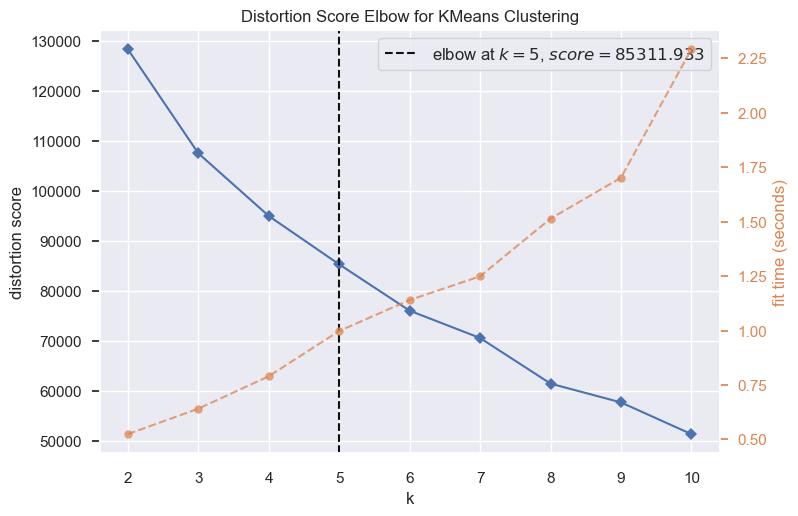

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
X = base.copy()
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(3,10)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

Il ressort que K= 5 serait une meilleur option avec un score de distorsion qui est la somme moyenne des carres des distances assez élevée.

## Coefficient de silhouette
Pour vérifier si ce clustering fonctionne, nous allons utiliser SilhouetteVisualizer pour afficher le coefficient de silhouette pour un échantillonage de chaque cluster. Cela permet de visualiser la densité et la séparation des clusters.

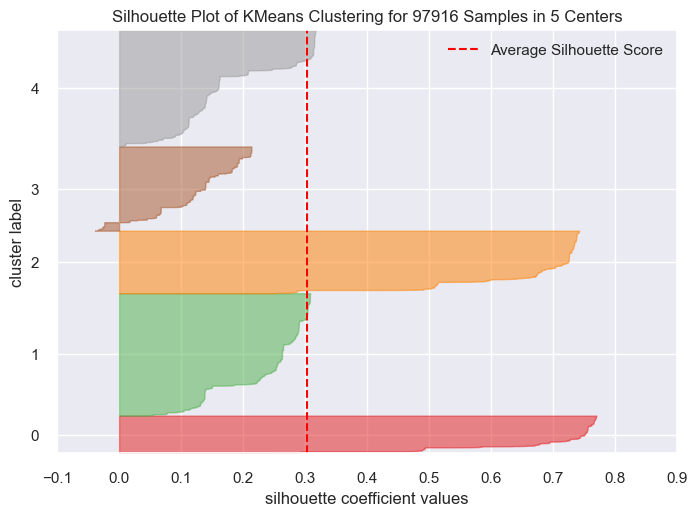

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 97916 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

Les clusters semblent bien repartis et les separations sont claires.

## DISTANCE ENTRE CLUSTER
Les clusters sont bien representees et aucun chevauchement entre les classes se qui temoigne un regroupement des individus tres proches.

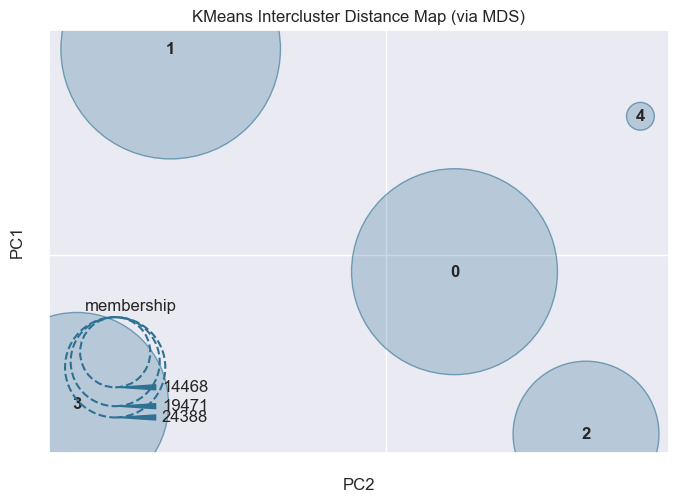

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [73]:

distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

## ANALYSE DES CLUSTERS
Nous allons entrainer notre KMeans avec le K optimal sélectionné et affecter son cluster à chaque client. Ainsi, nous pourrons analyser les différences entre chaque cluster :

In [74]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(X)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
X["kmeans_label"] = kmeans_labels

Nous allons dans un premier temps grouper les individus par cluster pour analyser les moyennes 

In [75]:
kmeans_clusters_means = X.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

,kmeans_label,order_item_id,price,freight_value,payment_sequential,payment_installments,review_score,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,...,product_category_Autres,product_category_Cadeaux_Fleurs,product_category_Fourniture_de_maison,product_category_Livre_AudioVisuel,product_category_Nourriture_Boisson,product_category_Sport,product_category_Technologies_Jouet,product_category_mode_vêtements_accessoires_beaute,locality_Different locality,locality_Same locality
0,0,1.026334,124.265252,26.811749,1.035803,3.921620,3.957423,0.0,0.948231,0.015275,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,1,1.013296,129.673681,22.116146,1.025527,3.030757,4.030314,0.0,0.947350,0.020121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
2,2,1.018193,112.662924,13.579488,1.027484,3.051259,4.216943,0.0,0.943618,0.023210,...,0.120677,0.088635,0.330130,0.009291,0.012965,0.073197,0.194157,0.170947,0.000000,1.000000
3,3,1.012055,154.708927,23.349699,1.026570,3.634369,4.096277,0.0,0.950959,0.016771,...,0.238437,0.207561,0.000000,0.016566,0.015540,0.164466,0.000000,0.357430,1.000000,0.000000
4,4,1.015613,107.283625,19.747669,1.000051,1.000000,4.106928,1.0,0.000000,0.000000,...,0.119665,0.081506,0.293308,0.010734,0.010426,0.080787,0.242771,0.160803,0.644497,0.355503


*Grouper par cluster*

In [76]:
X_bis = X.drop([
 'payment_type_boleto',
 'payment_type_credit_card',
 'payment_type_debit_card',
 'payment_type_not_defined',
 'payment_type_voucher',
 'product_category_Autres',
 'product_category_Cadeaux_Fleurs',
 'product_category_Fourniture_de_maison',
 'product_category_Livre_AudioVisuel',
 'product_category_Nourriture_Boisson',
 'product_category_Sport',
 'product_category_Technologies_Jouet',
 'product_category_mode_vêtements_accessoires_beaute',
 'locality_Different locality',
 'locality_Same locality','kmeans_label'], axis=1)
X_bis.head(6)

,order_item_id,price,freight_value,payment_sequential,payment_installments,review_score
0,1.0,29.99,8.72,1.0,1.0,4.0
3,1.0,29.99,7.78,1.0,3.0,4.0
4,1.0,29.99,7.78,1.0,1.0,5.0
5,1.0,29.99,14.10,1.0,1.0,3.0
6,2.0,46.80,67.70,1.0,1.0,1.0
7,1.0,28.90,21.15,1.0,1.0,4.0


In [77]:
def clustering_eval(preprocessor, model, data, metric, elbow=True, mds=False, KBest=None):
    
    if((elbow==True) & (mds==True)):
        ncols=3
    elif((elbow==False) | (mds==False)):
        ncols=2
    else:
        ncols=1
        
    fig, axes = plt.subplots(nrows=1, ncols=ncols, sharex=False, sharey=False, figsize=(24,8))
    
    ax=0
    if(elbow==True):
        # Elbow visualizer
        kmeans_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("kelbowvisualizer", KElbowVisualizer(model,K=(4,12), metric=metric, ax=axes[ax]))])
        kmeans_visualizer.fit(data)
        KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
        kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
        ax+=1
    
    # Set best K
    K = KBest
    model.set_params(n_clusters=K)

    # Silhouette Visualizer
    silhouette_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("silhouettevisualizer", SilhouetteVisualizer(model, ax=axes[ax]))])
    silhouette_visualizer.fit(data)
    silhouette_visualizer.named_steps['silhouettevisualizer'].finalize()
    ax+=1
    
    # Intercluster distance Map with best k
    if(mds==True):
        distance_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("distancevisualizer", InterclusterDistance(model, ax=axes[ax]))])
        distance_visualizer.fit(data)
        distance_visualizer.named_steps['distancevisualizer'].finalize()
    
    return K
    plt.show()

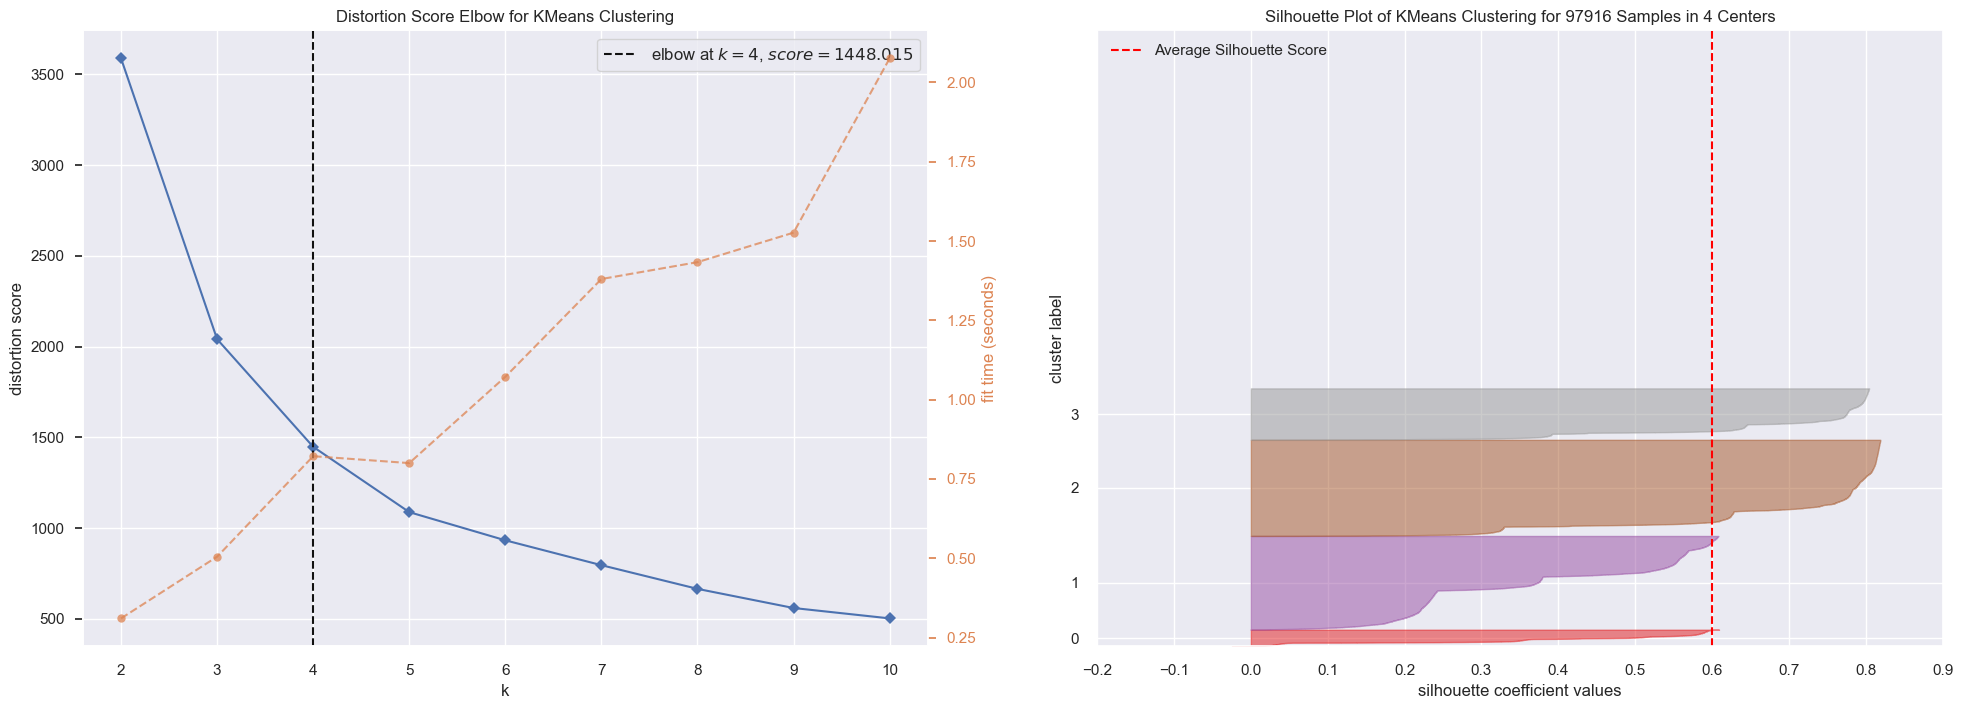

In [78]:
K = clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                data=X_bis, 
                metric="distortion",
                elbow=True,
                mds=False,
                KBest=None)

In [79]:
# KMeans Pipeline with best K
kmeans_model_bis = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_bis.fit(X_bis)

# Kmeans labels
kmeans_labels_bis = kmeans_model_bis.named_steps['kmeans'].labels_

# Scale X
scaler = MinMaxScaler()
X_scaled_bis = scaler.fit_transform(X_bis)
X_scaled_bis = pd.DataFrame(X_scaled_bis, index=X_bis.index, columns=X_bis.columns)
X_scaled_bis["kmeans_label"] = kmeans_labels_bis

# Group by cluster
X_scaled_clusters_bis = X_scaled_bis.groupby("kmeans_label").mean()



In [81]:

X_scaled_clusters_bis

,order_item_id,price,freight_value,payment_sequential,payment_installments,review_score
kmeans_label,,,,,,
0,0.002353,0.015849,0.048087,0.000862,0.099542,0.670249
1,0.006866,0.019993,0.052637,0.001003,0.131557,0.055297
2,0.001688,0.014531,0.044722,0.001081,0.069835,1.000000
3,0.003138,0.035091,0.062734,0.000114,0.319358,0.967433


# Réduction dimensionnelle - PCA

Nous allons réaliser une Analyse en Composantes Principales pour vérifier s'il est possible de catégoriser nos clients avec moins de variables. L'objectif étant de conserver une inertie de 95%

In [82]:
# PCA Pipeline
pca = Pipeline([("preprocessor", MinMaxScaler()),
                ("pca", PCA(svd_solver='full'))])
pca.fit(X_bis)
X_projected = pca.transform(X_bis)

## Eboulis des valeurs propres

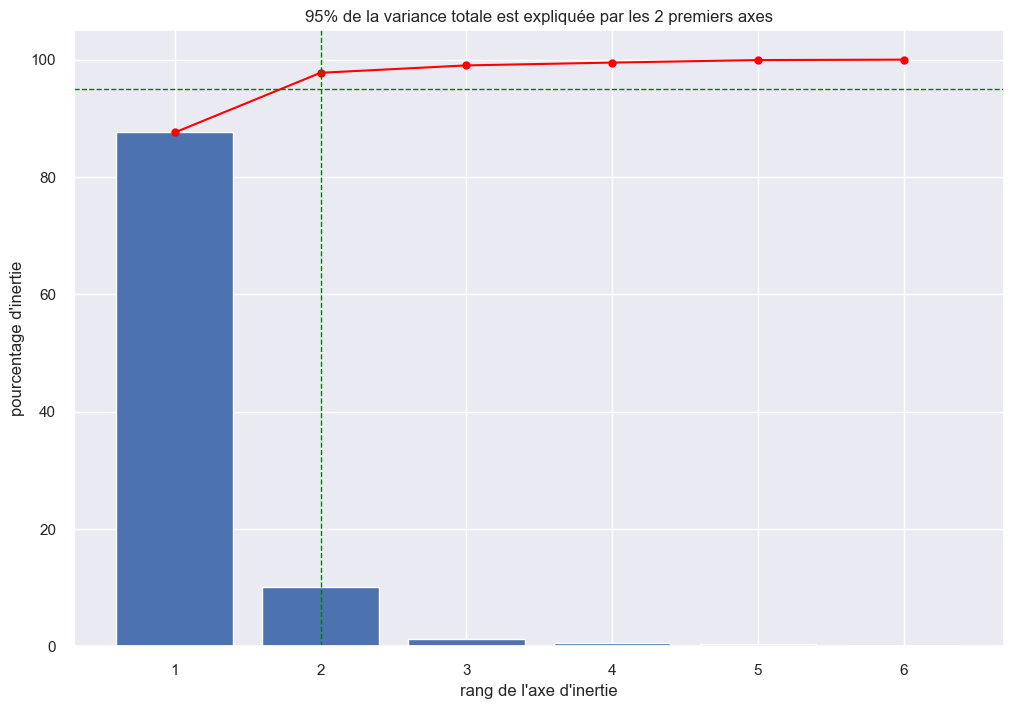

In [83]:
# Explained variance
varexpl = pca.named_steps['pca'].explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

Il faut donc conserver 2 axes principaux pour expliquer la variance à 95%

# Cercle des corrélations

In [84]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0):
    
    fig=plt.figure(figsize=(20,n_comp*5))
    count=1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            #fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=plt.subplot(int(n_comp/2),2,count)
            ax.set_aspect('equal', adjustable='box') 
            
            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                ax.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #ajouter les axes 
            ax.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            ax.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1, 
                                          round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, 
                                          round(100*pca.explained_variance_ratio_[d2],1)))

            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            count+=1
            
    plt.suptitle("Cercles des corrélations sur les {} premiers axes".format(n_comp),
                 y=.9, color="blue", fontsize=18)        
    plt.show(block=False)

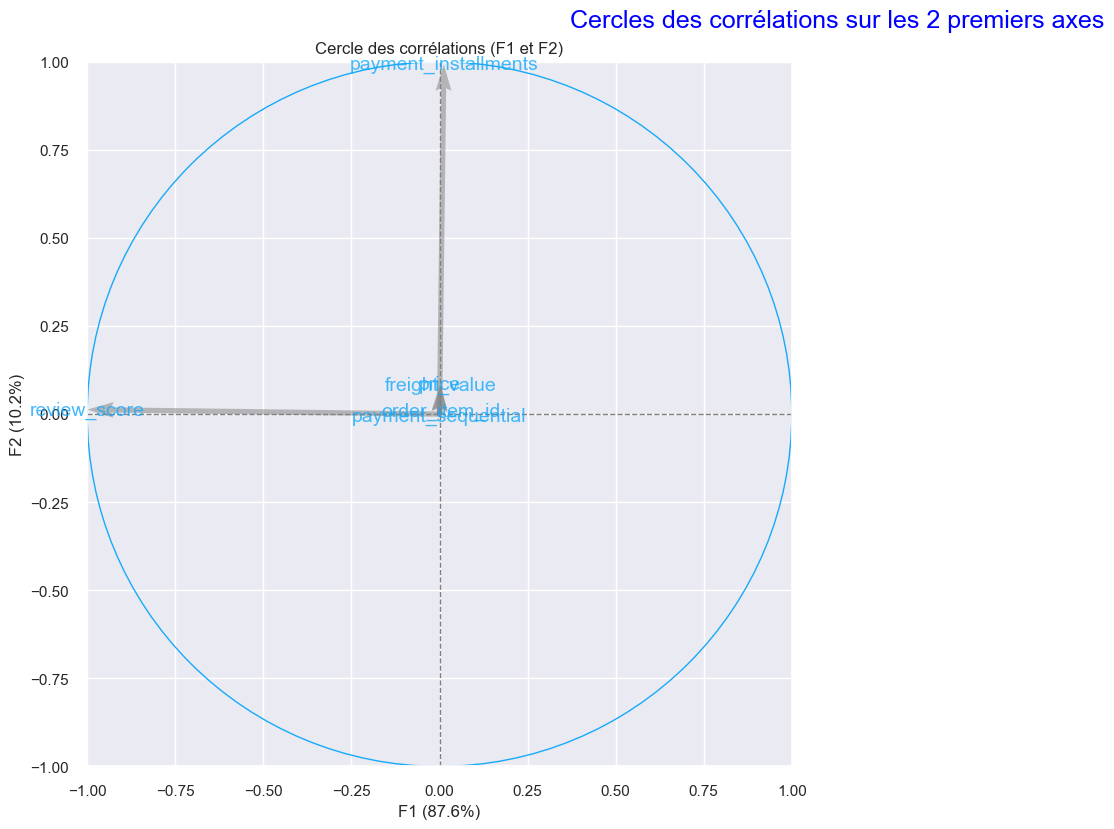

In [85]:
# Principal component space
pcs = pca.named_steps['pca'].components_

# Plot correlation circle
cerle_corr(pcs,
           2,
           pca.named_steps['pca'],
           [(0,1),(2,3),(4,5)],
           labels = np.array(X_bis.columns))

On peut ainsi voir parfaitement les variables qui contribuent le plus à chaque axe. Par exemple, 

* la variable synthétique F1 représentera nombre de versements choisis par le client..

* La variable synthétique F2 quant à elle représente l'avis de clients consernant lees services offerts par l'entreprise.

Nous allons donc intégrer à notre pipeline Kmeans une PCA sur 5 composantes pour vérifier si la réduction dimensionnelle réduit la qualité de la segmentation 

# K-Means après réduction de dimenssions

In [124]:
# KMeans Pipeline with best K for PCA results
kmeans_model_pca = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_pca.fit(X_projected[:,:4])

# Kmeans labels
pca_kmeans_labels = kmeans_model_pca.named_steps['kmeans'].labels_
X_scaled_bis["kmeans_label_pca"] = pca_kmeans_labels
X_scaled_clusters_pca = X_scaled_bis.groupby("kmeans_label_pca").mean()
df_centers=X_scaled_clusters_pca.iloc[:,:-1] 
df_centers

,order_item_id,price,freight_value,payment_sequential,payment_installments,review_score
kmeans_label_pca,,,,,,
0,0.003138,0.035091,0.062734,0.000114,0.319358,0.967433
1,0.006866,0.019993,0.052637,0.001003,0.131557,0.055297
2,0.001688,0.014531,0.044722,0.001081,0.069835,1.000000
3,0.002353,0.015849,0.048087,0.000862,0.099542,0.670249


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data
variables = ('Nombre article','Prix moyen','Prix moyen un panier','Nombre de mode de paiement',
           'Nombre de versement','Score')
X_scaled_clusters_pca.iloc[:,:-1]= df_centers       
data =(df_centers['order_item_id'][0],df_centers['price'][0],df_centers['freight_value'][0],df_centers['payment_sequential'][0],df_centers['payment_installments'][0],df_centers['review_score'][0])
data2 =(df_centers['order_item_id'][1],df_centers['price'][1],df_centers['freight_value'][1],df_centers['payment_sequential'][1],df_centers['payment_installments'][1],df_centers['review_score'][1])
data3 =(df_centers['order_item_id'][2],df_centers['price'][2],df_centers['freight_value'][2],df_centers['payment_sequential'][2],df_centers['payment_installments'][2],df_centers['review_score'][2])
data4 =(df_centers['order_item_id'][3],df_centers['price'][3],df_centers['freight_value'][3],df_centers['payment_sequential'][3],df_centers['payment_installments'][3],df_centers['review_score'][3])
data5 =(df_centers['order_item_id'][4],df_centers['price'][4],df_centers['freight_value'][4],df_centers['payment_sequential'][4],df_centers['payment_installments'][4],df_centers['review_score'][4])


ranges = [(0,0.01), (0,0.1), (0,0.1),
         (0,0.01), (0,1),(0,1)]     

# plotting
fig1 = plt.figure(figsize=(10, 10))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data,"-", lw=1, color="b", alpha=0.4, label = 'Cluster 0')
radar.plot(data2,"-", lw=2, color="g", alpha=0.4, label = 'Cluster 1')
radar.plot(data3,"-", lw=3, color="r", alpha=0.4, label = 'Cluster 2')
radar.plot(data4,"-", lw=4, color="m", alpha=0.4, label = 'Cluster 3')
radar.plot(data5,"-", lw=5, color="y", alpha=0.4, label = 'Cluster 4')
radar.fill(data, alpha=0.2)
radar.fill(data2, alpha=0.2)
radar.fill(data3, alpha=0.2)
radar.fill(data4, alpha=0.2)
radar.fill(data5, alpha=0.2)
radar.ax.legend()
plt.show()   

KeyError: 4

# CAH sur echantillon

### Classification ascendante hiérarchique


Nous allons utiliser les variables numeriques sans prendre celles converties en numeriques pour faire la CAH


In [90]:

data_bis = X.drop(['payment_type_boleto',
 'payment_type_credit_card',
 'payment_type_debit_card',
 'payment_type_not_defined',
 'payment_type_voucher',
 'product_category_Autres',
 'product_category_Cadeaux_Fleurs',
 'product_category_Fourniture_de_maison',
 'product_category_Livre_AudioVisuel',
 'product_category_Nourriture_Boisson',
 'product_category_Sport',
 'product_category_Technologies_Jouet',
 'product_category_mode_vêtements_accessoires_beaute',
 'locality_Different locality',
 'locality_Same locality'] ,axis = 1)
data_bis

,order_item_id,price,freight_value,payment_sequential,payment_installments,review_score,kmeans_label
0,1.0,29.99,8.72,1.0,1.0,4.0,2
3,1.0,29.99,7.78,1.0,3.0,4.0,2
4,1.0,29.99,7.78,1.0,1.0,5.0,2
5,1.0,29.99,14.10,1.0,1.0,3.0,4
6,2.0,46.80,67.70,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...
119138,1.0,44.99,7.58,1.0,1.0,1.0,2
119139,1.0,58.99,7.39,1.0,1.0,5.0,2
119140,1.0,23.99,7.43,1.0,1.0,5.0,4
119141,1.0,749.00,55.96,1.0,10.0,5.0,3


In [91]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, data_bis)])

In [92]:
Y = data_bis.copy()
Y.head(10)

,order_item_id,price,freight_value,payment_sequential,payment_installments,review_score,kmeans_label
0,1.0,29.99,8.72,1.0,1.0,4.0,2
3,1.0,29.99,7.78,1.0,3.0,4.0,2
4,1.0,29.99,7.78,1.0,1.0,5.0,2
5,1.0,29.99,14.10,1.0,1.0,3.0,4
6,2.0,46.80,67.70,1.0,1.0,1.0,2
7,1.0,28.90,21.15,1.0,1.0,4.0,0
8,1.0,24.90,7.78,1.0,1.0,5.0,2
9,1.0,64.99,23.26,1.0,2.0,3.0,0
11,1.0,64.99,14.77,1.0,7.0,5.0,2
12,1.0,29.99,18.31,1.0,4.0,5.0,0


In [93]:
# Step 3: Preprocessing the data

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Y)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
Y_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
Y_normalized = pd.DataFrame(Y_normalized)

In [94]:
# Explained variance
pca = PCA()
pca.fit(Y_normalized)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[0.31480478 0.24408249 0.20260397 0.1128796  0.0568304  0.01698342
 0.01380472]
[0.32724351 0.2537268  0.21060937 0.11733976 0.05907591 0.01765448
 0.01435018]


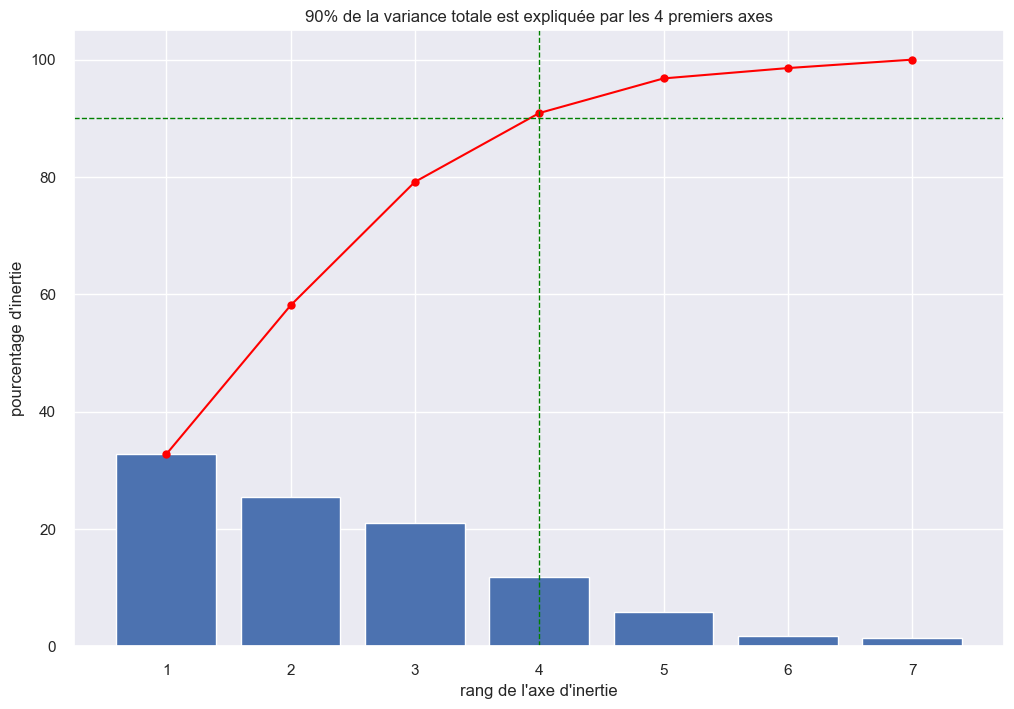

In [95]:
# Explained variance
pca = PCA()
pca.fit(Y_normalized)
varexpl = pca.explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=90, linestyle="--", 
            color="green",
            linewidth=1)

limit = 90
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [96]:
# 4 : Réduire la dimensionnalité des Données

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(Y_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [97]:
import numpy as np
from sklearn.model_selection import train_test_split

In [98]:
 X_train, X_test,  = train_test_split(
                     X_principal,  test_size=0.8, random_state=0)

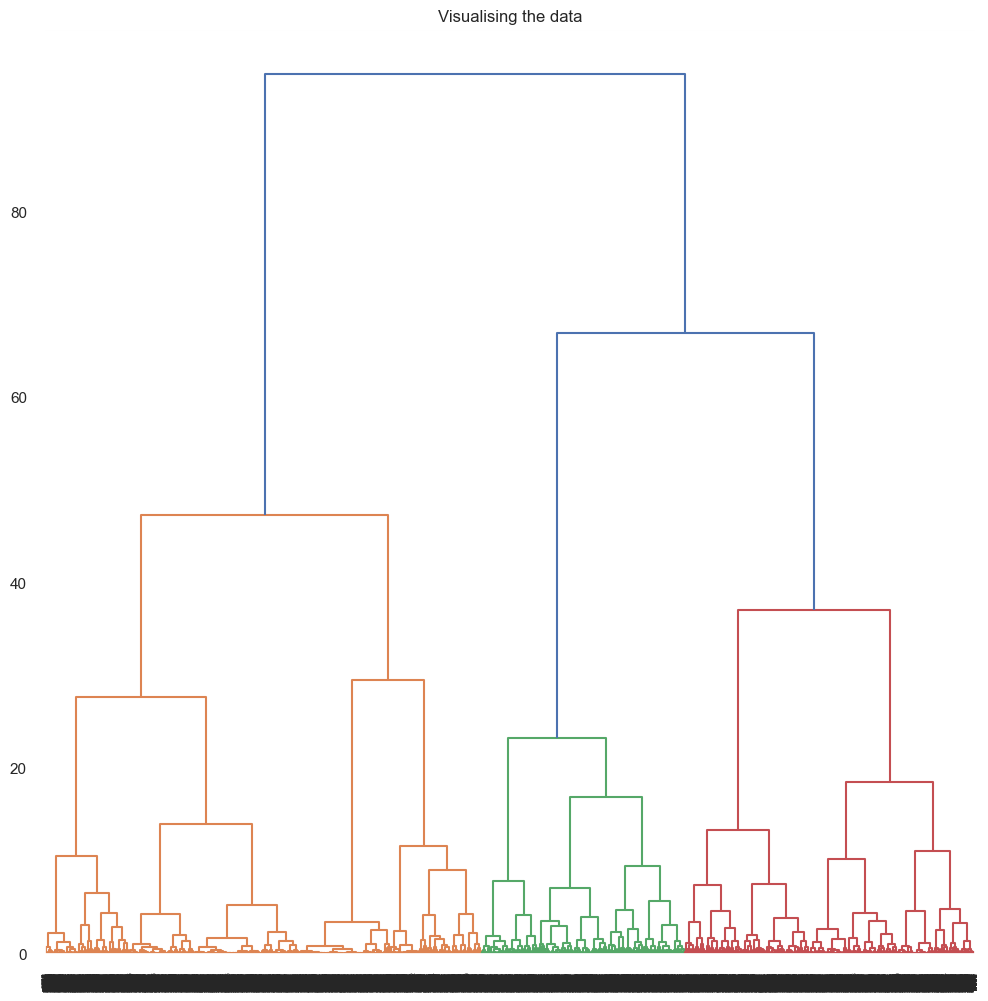

In [100]:
# Dendograms are used to divide a given cluster into many different clusters.

# Step 5: Visualizing the working of the Dendograms

plt.figure(figsize =(12, 12))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_train, method ='ward')))

In [101]:
 y_train, y_test,  = train_test_split(
                     X_principal,  test_size=0.2, random_state=0)

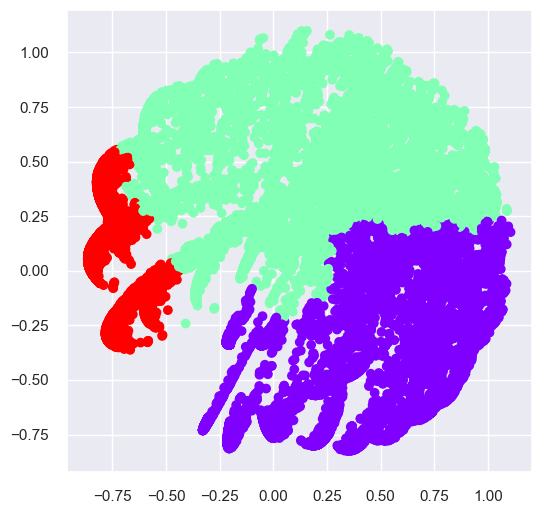

In [102]:
# k = 3

ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac3.fit_predict(y_test), cmap ='rainbow')
plt.show()

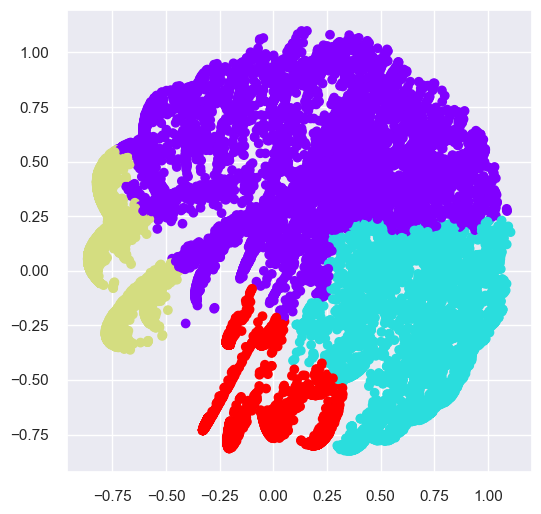

In [103]:
# k = 4

ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac4.fit_predict(y_test), cmap ='rainbow')
plt.show()

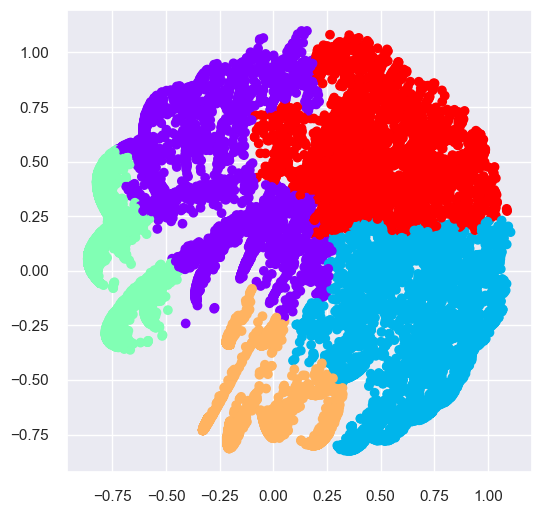

In [104]:
# k = 5

ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac5.fit_predict(y_test), cmap ='rainbow')
plt.show()

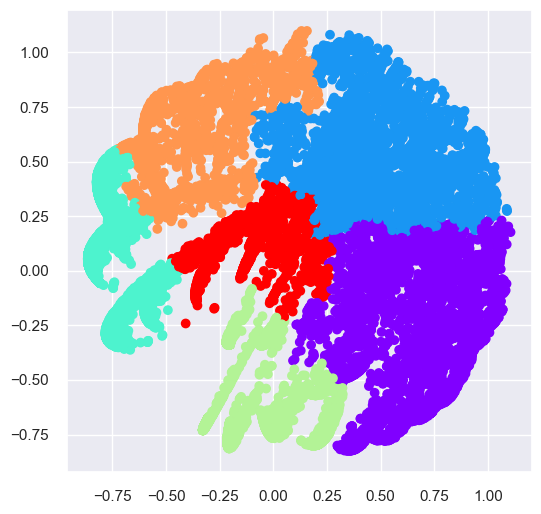

In [105]:
# k = 6

ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac6.fit_predict(y_test), cmap ='rainbow')
plt.show()

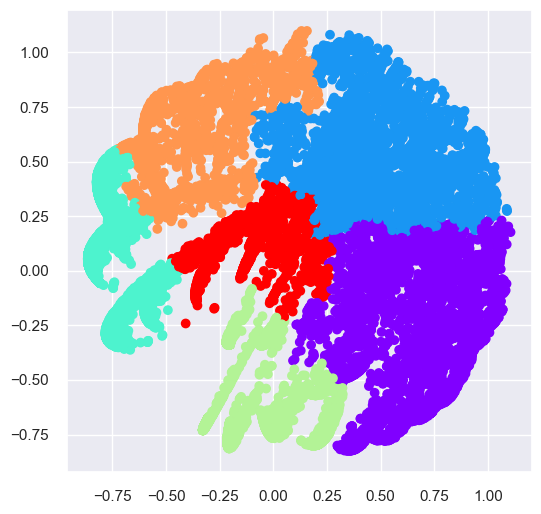

In [106]:
# k = 7

ac7 = AgglomerativeClustering(n_clusters = 7)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac6.fit_predict(y_test), cmap ='rainbow')
plt.show()

### We now determine the optimal number of clusters using a mathematical technique. Here, We will use the Silhouette Scores for the purpose.

In [107]:
# Step 7: Evaluating the different models and Visualizing the results.

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(y_test, ac4.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac5.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac6.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac7.fit_predict(y_test)))


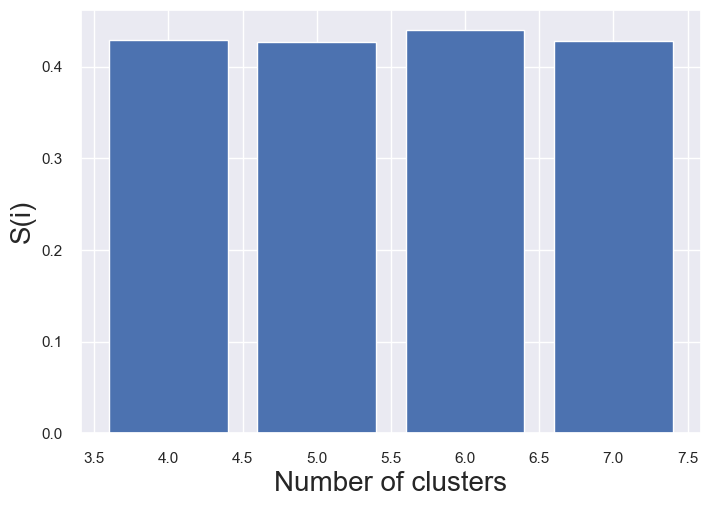

In [108]:
# Plotting a bar graph to compare the results
k = [ 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

### # Thus, with the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 6

In [109]:
Xbis_train,Xbis_test   = train_test_split(
                     Y_normalized,  test_size=0.8, random_state=0)

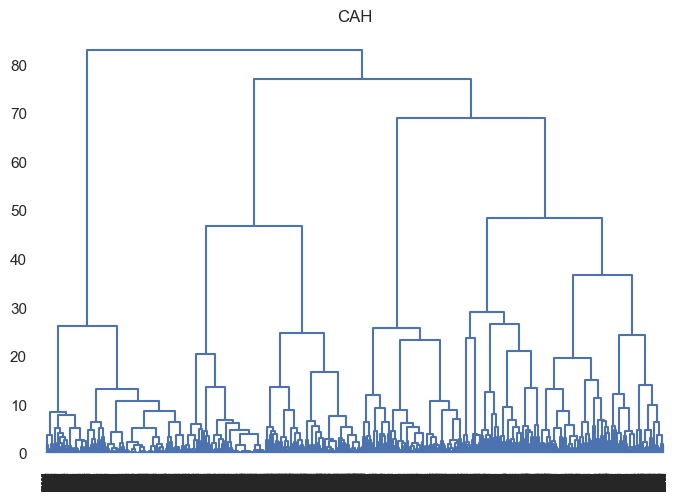

In [110]:
from scipy.cluster.hierarchy import linkage,dendrogram
Z = linkage(Xbis_train,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Xbis_train.index,orientation='top',color_threshold=0)
plt.show()


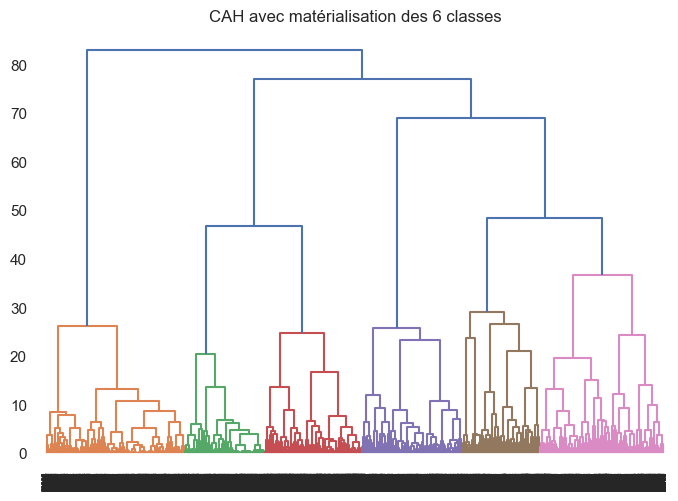

[6 6 2 ... 4 5 6]
        0
1   68476
1   41689
1   40464
1   50667
1   25901
..    ...
6   92894
6   87495
6   39306
6    9056
6   68268

[19583 rows x 1 columns]


In [113]:
from scipy.cluster.hierarchy import ward, fcluster
#matérialisation des classes (hauteur t = 38
plt.title('CAH avec matérialisation des 6 classes')
dendrogram(Z,labels=Xbis_train.index,orientation='top',color_threshold=38)
plt.show()
#découpage à la hauteur t = 38==> identifiants de  groupes obtenus
groupes_cah = fcluster(Z,t=38,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(X_train.index[idg],groupes_cah[idg]))


In [112]:
Xbis_train = pd.DataFrame(Xbis_train, index=Xbis_train.index, columns=Xbis_train.columns)
Xbis_train_clusters = Xbis_train.mean()
Xbis_train_clusters

0   -0.057049
1   -0.082780
2   -0.094882
3   -0.042911
4   -0.084935
5    0.093838
6    0.032732
dtype: float64

# CLUSTERING PAR DBSCAN

In [114]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.025, min_samples = 4).fit(X_principal)
labels = db_default.labels_

In [115]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [116]:
# Step 5: Building the clustering model
from sklearn import metrics
labels_true = X.index
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.025, min_samples = 4).fit(X_principal)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 7
Estimated number of noise points: 21
Homogeneity: 0.0007
Completeness: 1.0000
V-measure: 0.0014
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: 0.0000
Silhouette Coefficient: -0.5856


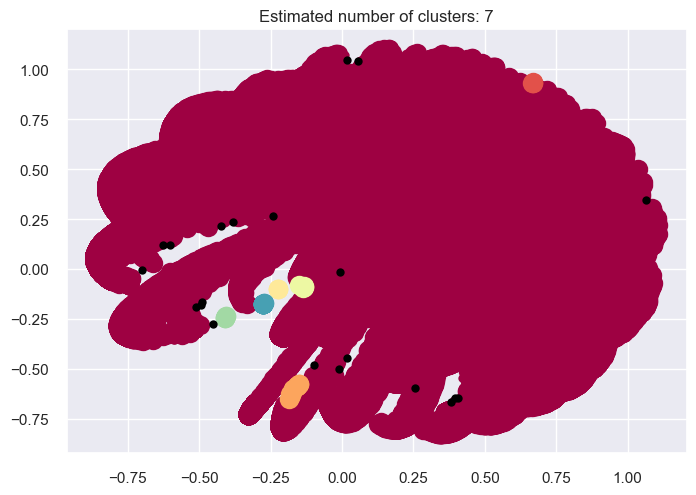

In [117]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_principal[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_principal[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## DBSCAN clustering de la donnée brute (sans PCA)

In [118]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.405, min_samples = 4).fit(Y_normalized)
labels = db_default.labels_

In [119]:
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [120]:
# Step 5: Building the clustering model
from sklearn import metrics
labels_true = X.index
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.405, min_samples = 4).fit(Y_normalized)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 1
Homogeneity: 0.0067
Completeness: 1.0000
V-measure: 0.0133
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: 0.0000
Silhouette Coefficient: -0.3064


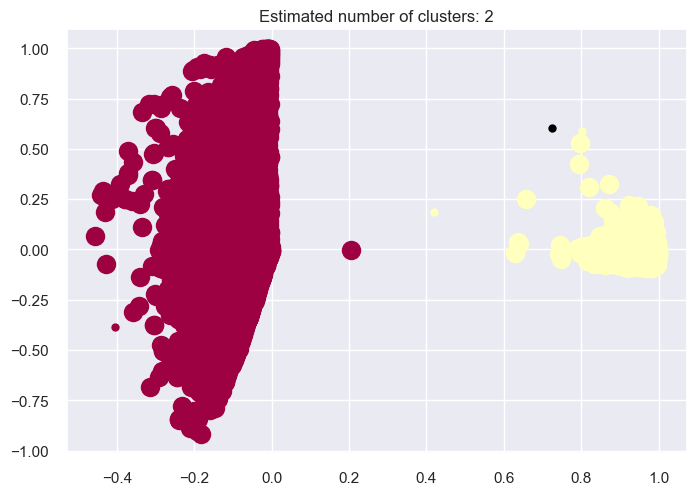

In [121]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Y_normalized[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Y_normalized[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Conclusion

## En conclusion on a partitionné notre data set clients en utilisant diffents algorithmes dont K-Means, Classification hierarchique selon Ward, et DBSCAN, les resultas malgre certainnes imperfections tournent autour de 4 ,5 et 6 clusters ,mais le plus probants quant au score (silhouette)  est le modele K-Means dont on garde les resultats.

## Interprétation métier des clusters selon  K-Means

### Groupe 1 : Clients proches du vendeur, paient les articles par carte de credit pour des prix assez eleve. Les avis de ces clients sont également très bons.

### Groupe 2 : Clients très eloignes du vendeur,qui achetent des produits alimentaires(avec de diversite).Les avis de ces clients sont  mauvais.

### Groupe 3 : Regroupe les clients qui utilisent les billets comme moyens de paiement pour payer la plus part de temps des cadeaux et fleurs. Les avis de ces clients sont également bons.

### Groupe 4 : Ce sont des clients mécontants (les avis sont mauvais).ils commandent souvent les produits de sport et de technologies avec un important quantites d'article et utilise la plupart le carte de credit

### Groupe 5 : Ces clients sont satisfaits. ils paient comptant pour un montant moyen de commande. Ils sont géographiquement proches.

